<a href="https://colab.research.google.com/github/ArunK-ML/Project---Shopper-Spectrum-Customer-Segmentation-and-Product-Recommendations-in-E-Commerce/blob/main/Shopper_Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **üõí Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce**

# **Step 1:Dataset Collection and understanding**

In [1]:
import pandas as pd
df = pd.read_csv('/content/online_retail.csv')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom

In [2]:
df.shape

(541909, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(5268)

# **Step 2: üìå Data Preprocessing:**

**Handle Null Value**

In [6]:
df = df.dropna(subset=["CustomerID","Country"])

df["Description"] = df["Description"].fillna("No Description")

**Exclude cancelled invoices (InvoiceNo starting with 'C')**

In [7]:
# Remove cancelled invoices (InvoiceNo starting with 'C')
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

**Remove negative or zero quantities and prices**

In [8]:
# Keep only rows where Quantity > 0 and UnitPrice > 0
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

**DateTime DataType Conversation**

In [9]:
# Parse invoice date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Split into Date and Time
df["InvoiceDay"] = df["InvoiceDate"].dt.date
df["InvoiceTime"] = df["InvoiceDate"].dt.time


# **Feature Engineering**

In [10]:
from datetime import timedelta
# Add revenue column
df["Total_Amount"] = df["Quantity"] * df["UnitPrice"]

# Reference date = 1 day after last transaction in dataset
ref_date = df["InvoiceDate"].max() + timedelta(days=1)

# ==============================
# üìå RFM Feature Engineering
# ==============================
rfm = df.groupby("CustomerID").agg(
    Recency=("InvoiceDate", lambda x: (ref_date - x.max()).days),
    Frequency=("InvoiceNo", "nunique"),
    Monetary=("Total_Amount", "sum")
).reset_index()

# Merge RFM values into the main transaction dataset
df = df.merge(rfm, on="CustomerID", how="left")

# **Step 3 :üìå Exploratory Data Analysis (EDA):**

In [11]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  InvoiceDay  \
0 2022-12-01 08:26:00       2.55     17850.0  United Kingdom  2022-12-01   
1 2022-12-01 08:26:00       3.39     17850.0  United Kingdom  2022-12-01   
2 2022-12-01 08:26:00       2.75     17850.0  United Kingdom  2022-12-01   
3 2022-12-01 08:26:00       3.39     17850.0  United Kingdom  2022-12-01   
4 2022-12-01 08:26:00       3.39     17850.0  United Kingdom  2022-12-01   

  InvoiceTime  Total_Amount  Recency  Frequency  Monetary  
0    08:26:00         15.30      372         34   5391.21  
1    08:26:00         20.34      372         34   5391.21  
2    08:26:00         22.00      372         34   5391.21  
3    08:26:00         20.34      372         34   5391.21  
4    08:26:00         20.34      372         34   5391.21

In [12]:
df.shape

(397884, 14)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from datetime import timedelta



üìå Transaction volume by country (unique invoices):
Country
United Kingdom    16646
Germany             457
France              389
EIRE                260
Belgium              98
Netherlands          94
Spain                90
Portugal             57
Australia            57
Switzerland          51
Name: InvoiceNo, dtype: int64


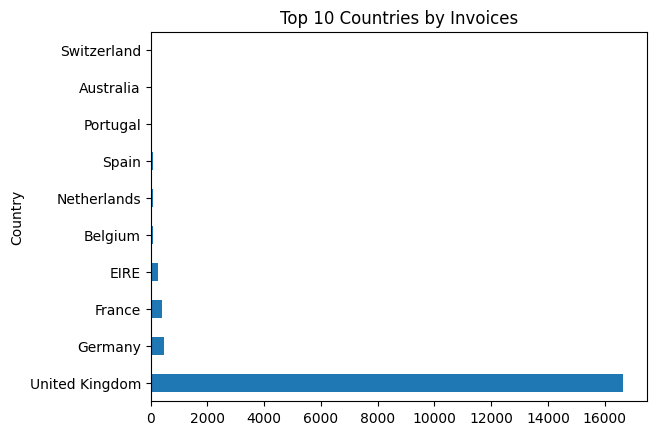

In [14]:
# -----------------------------
# 1) Transaction volume by country
# -----------------------------
tx_by_country = (
    df.groupby("Country")["InvoiceNo"]
      .nunique()
      .sort_values(ascending=False)
)
print("\nüìå Transaction volume by country (unique invoices):")
print(tx_by_country.head(10))

tx_by_country.head(10).plot(kind="barh", title="Top 10 Countries by Invoices")
plt.show()

In [15]:
# -----------------------------
# 2) Top-selling products
# -----------------------------
# By quantity
prod_qty = (
    df.groupby(["StockCode", "Description"])["Quantity"]
      .sum()
      .sort_values(ascending=False)
)
print("\nüìå Top 10 Products by Quantity Sold:")
print(prod_qty.head(10))

# By revenue
prod_rev = (
    df.groupby(["StockCode", "Description"])["Total_Amount"]
      .sum()
      .sort_values(ascending=False)
)
print("\nüìå Top 10 Products by Total Amount:")
print(prod_rev.head(10))


üìå Top 10 Products by Quantity Sold:
StockCode  Description                       
23843      PAPER CRAFT , LITTLE BIRDIE           80995
23166      MEDIUM CERAMIC TOP STORAGE JAR        77916
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
85099B     JUMBO BAG RED RETROSPOT               46181
85123A     WHITE HANGING HEART T-LIGHT HOLDER    36725
84879      ASSORTED COLOUR BIRD ORNAMENT         35362
21212      PACK OF 72 RETROSPOT CAKE CASES       33693
22197      POPCORN HOLDER                        30931
23084      RABBIT NIGHT LIGHT                    27202
22492      MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

üìå Top 10 Products by Total Amount:
StockCode  Description                       
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
22423      REGENCY CAKESTAND 3 TIER              142592.95
85123A     WHITE HANGING HEART T-LIGHT HOLDER    100448.15
85099B     JUMBO BAG RED RETROSPOT                85220.78
23166      MED

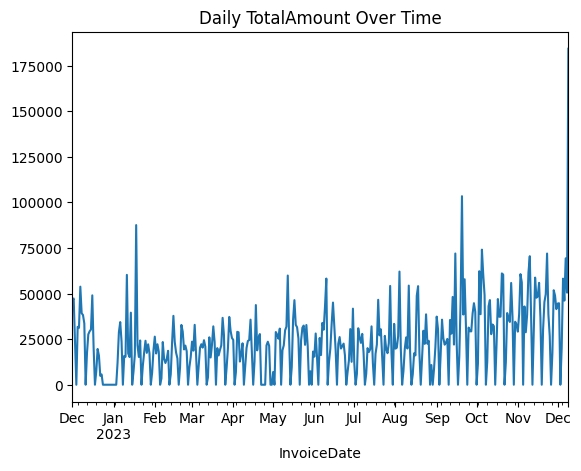

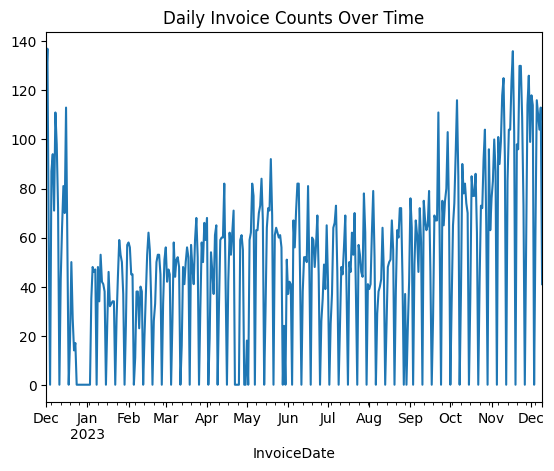

In [16]:
# -----------------------------
# 3) Purchase trends over time
# -----------------------------
daily = df.set_index("InvoiceDate").resample("D").agg(
    Revenue=("Total_Amount", "sum"),
    Invoices=("InvoiceNo", "nunique")
)

daily["Revenue"].plot(title="Daily TotalAmount Over Time")
plt.show()

daily["Invoices"].plot(title="Daily Invoice Counts Over Time")
plt.show()

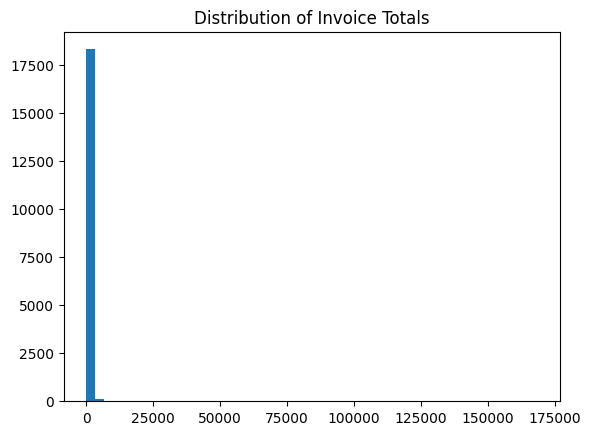

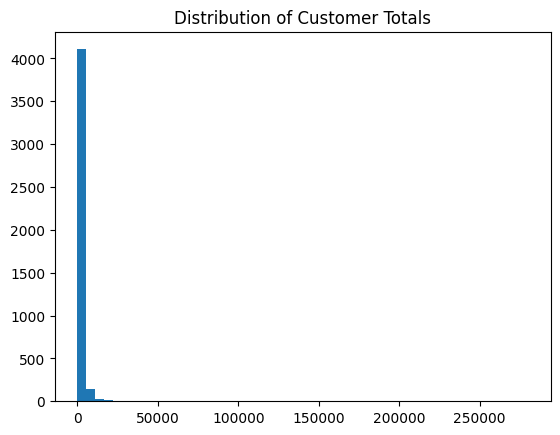

In [17]:
# -----------------------------
# 4) Monetary distribution
# -----------------------------
invoice_totals = df.groupby("InvoiceNo")["Total_Amount"].sum()
customer_totals = df.groupby("CustomerID")["Total_Amount"].sum()

plt.hist(invoice_totals, bins=50)
plt.title("Distribution of Invoice Totals")
plt.show()

plt.hist(customer_totals, bins=50)
plt.title("Distribution of Customer Totals")
plt.show()


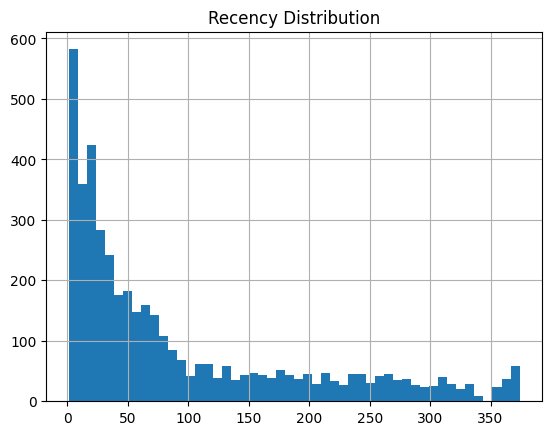

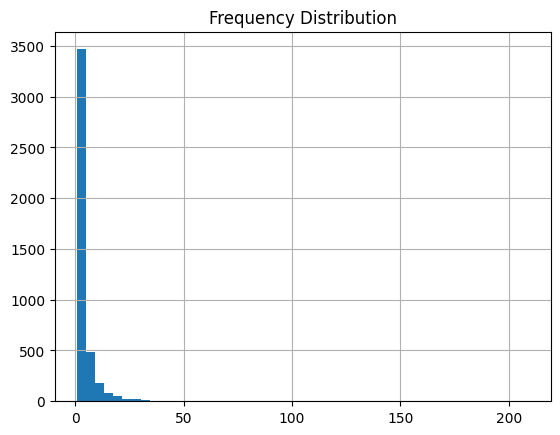

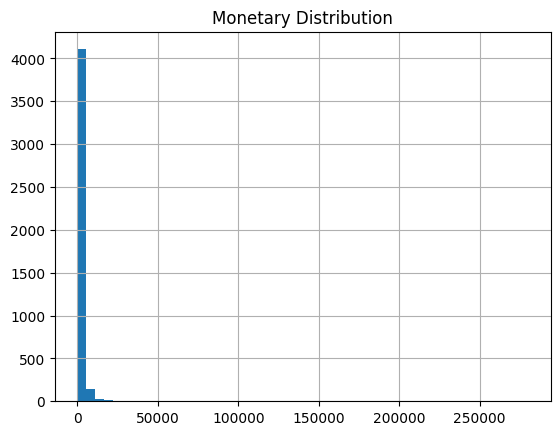

In [18]:
# -----------------------------
# 5) RFM analysis
# -----------------------------

# Histograms
rfm[["Recency"]].hist(bins=50)
plt.title("Recency Distribution")
plt.show()

rfm[["Frequency"]].hist(bins=50)
plt.title("Frequency Distribution")
plt.show()

rfm[["Monetary"]].hist(bins=50)
plt.title("Monetary Distribution")
plt.show()



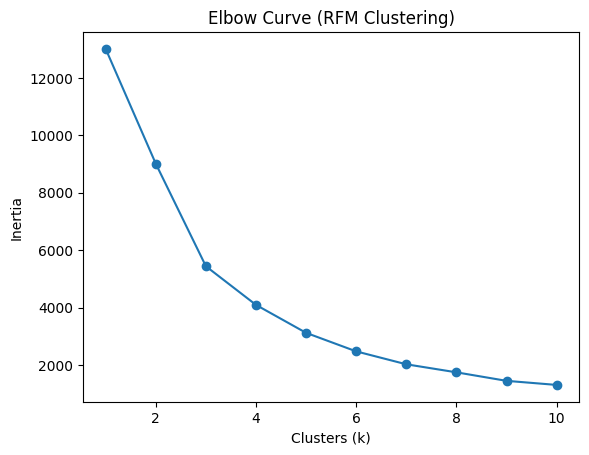


üìå Customer Cluster Profiles:
           CustomerID     Recency  Frequency       Monetary
Cluster                                                    
0        15289.128356   43.702685   3.682711    1359.049284
1        15347.791940  248.075914   1.552015     480.617480
2        15435.000000    7.384615  82.538462  127338.313846
3        15212.857843   15.500000  22.333333   12709.090490


In [19]:
# -----------------------------
# 6) Elbow curve for KMeans clustering
# -----------------------------
X = rfm[["Recency", "Frequency", "Monetary"]]
X_scaled = StandardScaler().fit_transform(X)

inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker="o")
plt.title("Elbow Curve (RFM Clustering)")
plt.xlabel("Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Choose k=4 as example
km_final = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm["Cluster"] = km_final.fit_predict(X_scaled)

print("\nüìå Customer Cluster Profiles:")
print(rfm.groupby("Cluster").mean())

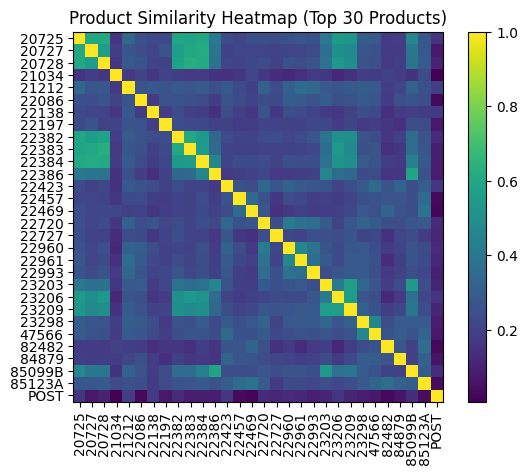

In [20]:
# -----------------------------
# 7) Product recommendation heatmap
# -----------------------------
# Pick top N products
topN = 30
top_prod_codes = (
    df.groupby("StockCode")["InvoiceNo"]
      .nunique()
      .sort_values(ascending=False)
      .head(topN)
      .index
)

df_top = df[df["StockCode"].isin(top_prod_codes)]
cust_prod = (
    df_top.assign(Buy=1)
          .pivot_table(index="CustomerID", columns="StockCode", values="Buy", aggfunc="max", fill_value=0)
)

sim_matrix = pd.DataFrame(
    cosine_similarity(cust_prod.T),
    index=cust_prod.columns,
    columns=cust_prod.columns
)

plt.imshow(sim_matrix, cmap="viridis")
plt.xticks(range(len(sim_matrix.columns)), sim_matrix.columns, rotation=90)
plt.yticks(range(len(sim_matrix.index)), sim_matrix.index)
plt.title("Product Similarity Heatmap (Top 30 Products)")
plt.colorbar()
plt.show()


# **Distribution Check**

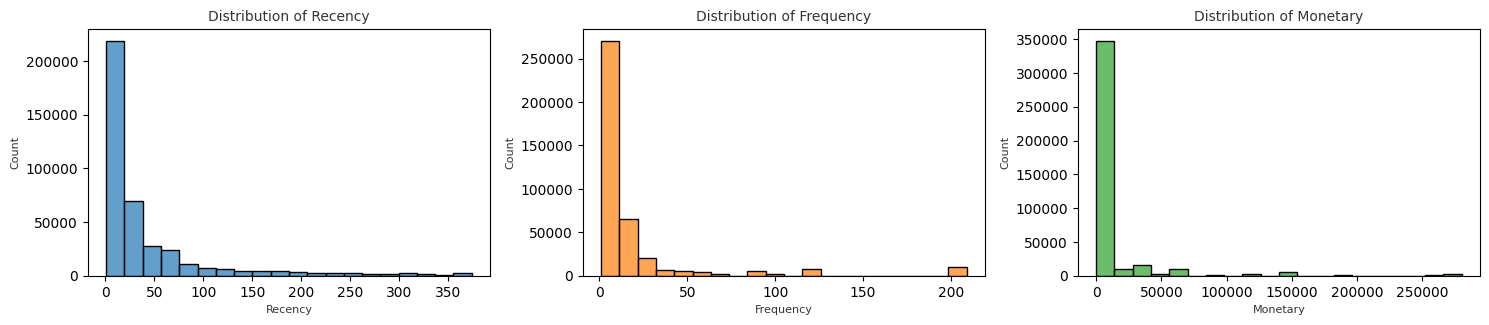

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Blue, Orange, Green, Red, Purple, Brown

plt.figure(figsize=(15, 18)) # size figure

# loop over each column to draw
numerical_cols = ["Recency", "Frequency", "Monetary"]
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)  # (row, col, #plot) - Changed to 6 rows and 3 columns to accommodate all numerical columns
    sns.histplot(df[col], bins=20, color=colors[i % len(colors)], alpha=0.7) # histogram
    plt.title(f'Distribution of {col}', fontsize=10, color='#333333')
    plt.xlabel(col, fontsize=8, color='#333333')
    plt.ylabel('Count', fontsize=8, color='#333333')

plt.tight_layout()
plt.show()


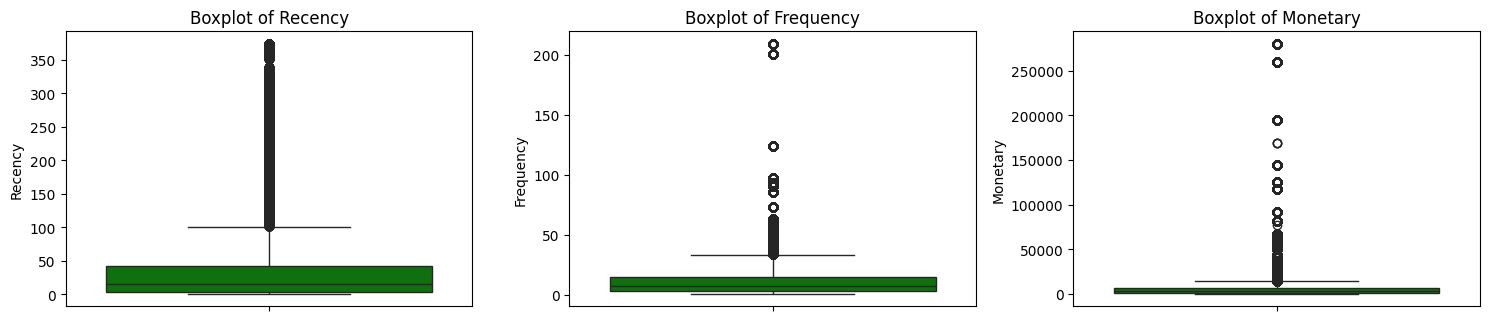

In [22]:
# Outliers

plt.figure(figsize=(15, 18)) # size figure
# loop over each columns
numerical_cols = ["Recency", "Frequency", "Monetary"]
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.boxplot(df[col], color='green')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Select numeric columns
num_cols = ["Recency", "Frequency", "Monetary"]

# Make a copy of the numeric columns for transformation
df_boxcox = df[num_cols].copy()

# Apply Box-Cox transformation
for col in num_cols:
    # Ensure all values are positive
    min_val = df_boxcox[col].min()
    if min_val <= 0:
        df_boxcox[col] = df_boxcox[col] + abs(min_val) + 1e-6  # shift to positive

    # Apply Box-Cox
    df_boxcox[col], _ = boxcox(df_boxcox[col])

# Save back the transformed columns into the original df
df[num_cols] = df_boxcox

In [24]:
# ----------------------------
#    Handle Outliers (IQR Method)
# ----------------------------
def remove_outliers_iqr(data):
    df_out = data.copy()
    num_cols = ["Recency", "Frequency", "Monetary"]

    # Initialize a mask with all True
    mask = np.ones(len(df_out), dtype=bool)

    for col in num_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= (df_out[col] >= lower) & (df_out[col] <= upper)  # combine masks

    df_out = df_out[mask]
    return df_out

# Apply function
df = remove_outliers_iqr(df)



# **Step 4 : üìå Clustering Methodology:**

**2Ô∏è‚É£ Standardize/Normalize the RFM values**

In [25]:
from sklearn.preprocessing import StandardScaler

# Select only the RFM columns
rfm_values = df[["Recency", "Frequency", "Monetary"]]

# Standardize (mean=0, std=1)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_values)

# Store in a new DataFrame with same index
rfm_scaled_df = pd.DataFrame(rfm_scaled,
                             columns=["Recency_scaled", "Frequency_scaled", "Monetary_scaled"],
                             index=df.index)

# Concatenate back with original RFM
df = pd.concat([df, rfm_scaled_df], axis=1)

# Preview
df.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  InvoiceDay  \
0 2022-12-01 08:26:00       2.55     17850.0  United Kingdom  2022-12-01   
1 2022-12-01 08:26:00       3.39     17850.0  United Kingdom  2022-12-01   
2 2022-12-01 08:26:00       2.75     17850.0  United Kingdom  2022-12-01   
3 2022-12-01 08:26:00       3.39     17850.0  United Kingdom  2022-12-01   
4 2022-12-01 08:26:00       3.39     17850.0  United Kingdom  2022-12-01   

  InvoiceTime  Total_Amount   Recency  Frequency  Monetary  Recency_scaled  \
0    08:26:00         15.30  6.157538   2.666589  5.333248        2.160655   
1    08:26:00         20.34  6.157538   2.666589  5.333248        2.160655   
2    08:26:00         22.00  6.157538   2.666589  5.333248        2.160655   
3    08:26:00         20.34  6.157538   2.666589  5.333248        2.160655   
4    08:26:00         20.34  6.157538   2.666589  5.333248        2.160655   

   Frequency_scaled  Monetary_scaled  
0          1.230929         0.502695  
1          1.230929         0.502695  
2          1.230929         0.502695  
3          1.230929         0.502695  
4          1.230929         0.502695

# **3Ô∏è‚É£ Choose Clustering Algorithm (KMeans, DBScan, Hierarchial etc)**

**1. KMeans (most common for RFM)**

In [27]:
from sklearn.cluster import KMeans

# Use the scaled RFM values
X = df[["Recency_scaled", "Frequency_scaled", "Monetary_scaled"]]

# Fit KMeans (example with k=4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X)

print(df.groupby("KMeans_Cluster")[["Recency", "Frequency", "Monetary"]].mean())


                 Recency  Frequency  Monetary
KMeans_Cluster                               
0               3.621997   1.359286  4.919967
1               0.798945   2.886255  5.866711
2               1.935161   1.932198  5.212957
3               4.478015   0.439354  4.342317


**2. DBSCAN (density-based clustering)**

In [ ]:
# from sklearn.cluster import DBSCAN

# db = DBSCAN(eps=1.5, min_samples=5)  # tune eps & min_samples
# df["DBSCAN_Cluster"] = db.fit_predict(X)

# print(df["DBSCAN_Cluster"].value_counts())


**3. Hierarchical Clustering (Agglomerative)**

In [ ]:
# from sklearn.cluster import AgglomerativeClustering

# hc = AgglomerativeClustering(n_clusters=4, linkage="ward")
# df["HC_Cluster"] = hc.fit_predict(X)

# print(df.groupby("HC_Cluster")[["Recency", "Frequency", "Monetary"]].mean())


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selected Scaled Column
X = df[["Recency_scaled", "Frequency_scaled", "Monetary_scaled"]]

# Fit the model
model = KMeans(n_clusters=4, random_state=42,  n_init=10)
model.fit(X)

# Predict cluster labels
group = model.predict(X)

# Calculate Silhouette Score
score = silhouette_score(X, group)

print("Silhouette Score:", round(score, 3))

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import pandas as pd

# List to store silhouette scores
silhouette_scores = []

# Loop from k=2 to a sensible max value
max_k = 10  # Limit for performance

for i in range(2, max_k):
    model = KMeans(n_clusters=i, random_state=42, n_init=10)
    group = model.fit_predict(df[["Recency_scaled", "Frequency_scaled", "Monetary_scaled"]])
    score = silhouette_score(df[["Recency_scaled", "Frequency_scaled", "Monetary_scaled"]], group)
    silhouette_scores.append(score)

# Prepare DataFrame for Plotly
results_df = pd.DataFrame({
    "Number of Clusters (k)": list(range(2, max_k )),
    "Silhouette Score": silhouette_scores
})

# Plot using Plotly Express
fig = px.line(
    results_df,
    x="Number of Clusters (k)",
    y="Silhouette Score",
    markers=True,
    title="Silhouette Score for Different Values of k"
)

fig.update_layout(
    xaxis_title="Number of Clusters (k)",
    yaxis_title="Silhouette Score",
    template="plotly_white"
)

fig.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selected Scaled Column
X = df[["Recency_scaled", "Frequency_scaled", "Monetary_scaled"]]

# Fit the model
model = KMeans(n_clusters=4, max_iter=200, tol=1e-3, n_init=10)
model.fit(X)

# Predict cluster labels
group = model.predict(X)

# Calculate Silhouette Score
score = silhouette_score(X, group)

print("Silhouette Score:", round(score, 3))

In [ ]:
 # import pandas as pd
# from sklearn.cluster import MiniBatchKMeans
# import hdbscan
# import matplotlib.pyplot as plt
# import seaborn as sns

# # ----------------------------
# # 1Ô∏è‚É£ MiniBatch K-Means
# # ----------------------------
# k = 5  # Number of clusters (choose based on Elbow method)
# mbk = MiniBatchKMeans(n_clusters=k, batch_size=1000, random_state=42)
# df_scaled['MBK_Cluster'] = mbk.fit_predict(df_scaled)

# # Plot MiniBatch K-Means clusters (pairplot for RFM)
# sns.pairplot(df_scaled, vars=['Recency', 'Frequency', 'Monetary'], hue='MBK_Cluster', palette='Set2')
# plt.suptitle("MiniBatch K-Means Clusters", y=1.02)
# plt.show()

# # ----------------------------
# # 2Ô∏è‚É£ HDBSCAN
# # ----------------------------
# # Minimum cluster size (adjust based on your dataset)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')
# df_scaled['HDBSCAN_Cluster'] = clusterer.fit_predict(df_scaled[['Recency', 'Frequency', 'Monetary']])

# # Plot HDBSCAN clusters
# sns.pairplot(df_scaled, vars=['Recency', 'Frequency', 'Monetary'], hue='HDBSCAN_Cluster', palette='Set1')
# plt.suptitle("HDBSCAN Clusters", y=1.02)
# plt.show()

# # ----------------------------
# # Optional: Check number of clusters
# # ----------------------------
# print("MiniBatch K-Means cluster counts:")
# print(df_scaled['MBK_Cluster'].value_counts())

# print("\nHDBSCAN cluster counts (-1 = noise):")
# print(df_scaled['HDBSCAN_Cluster'].value_counts())


In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import pandas as pd
# import plotly.express as px

# # Prepare lists
# silhouette_scores = []
# wcss = []
# k_values = list(range(2, min(20, len(df) - 1) + 1))

# # Loop through values of k
# for k in k_values:
#     model = KMeans(n_clusters=k, random_state=42, n_init=10)
#     labels = model.fit_predict(df.iloc[:, :-1])

#     silhouette_scores.append(silhouette_score(df.iloc[:, :-1], labels))
#     wcss.append(model.inertia_)

# # Normalize both metrics for a fair comparison
# silhouette_norm = (pd.Series(silhouette_scores) - min(silhouette_scores)) / (max(silhouette_scores) - min(silhouette_scores))
# wcss_norm = (pd.Series(wcss) - min(wcss)) / (max(wcss) - min(wcss))

# # Combine into a DataFrame for Plotly Express
# metrics_df = pd.DataFrame({
#     'Number of Clusters (k)': k_values * 2,
#     'Score': list(silhouette_norm) + list(wcss_norm),
#     'Metric': ['Silhouette Score'] * len(k_values) + ['WCSS (Normalized)'] * len(k_values)
# })

# # Plot with Plotly Express
# fig = px.line(
#     metrics_df,
#     x='Number of Clusters (k)',
#     y='Score',
#     color='Metric',
#     markers=True,
#     title='Silhouette Score vs WCSS (Normalized) using Plotly Express'
# )

# fig.update_layout(
#     yaxis_title='Normalized Score',
#     xaxis_title='Number of Clusters (k)',
#     template='plotly_white'
# )

# fig.show()


**5Ô∏è‚É£ Run Clustering**


üìå Customer Cluster Profiles:
         Recency  Frequency  Monetary
Cluster                              
0           3.62       1.36      4.92
1           0.80       2.89      5.87
2           1.94       1.93      5.21
3           4.48       0.44      4.34

üìå Number of Customers per Cluster:
Cluster
2    133066
0    126507
3     69579
1     63048
Name: count, dtype: int64


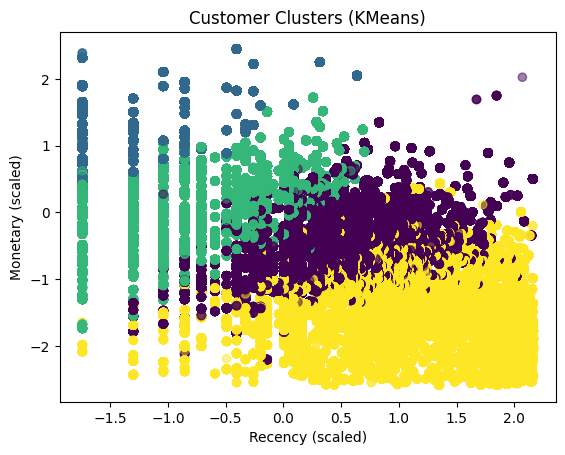

In [30]:
from sklearn.cluster import KMeans

# ==============================
# üìå Run KMeans Clustering
# ==============================

# Choose number of clusters
best_k = 4

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(
    df[["Recency_scaled", "Frequency_scaled", "Monetary_scaled"]]
)

# ==============================
# üìä Cluster Profiling
# ==============================
cluster_profile = (
    df.groupby("Cluster")[["Recency", "Frequency", "Monetary"]]
          .mean()
          .round(2)
)
print("\nüìå Customer Cluster Profiles:")
print(cluster_profile)

# Cluster sizes
print("\nüìå Number of Customers per Cluster:")
print(df["Cluster"].value_counts())

# Optional visualization
import matplotlib.pyplot as plt

plt.scatter(df["Recency_scaled"], df["Monetary_scaled"],
            c=df["Cluster"], cmap="viridis", alpha=0.5)
plt.xlabel("Recency (scaled)")
plt.ylabel("Monetary (scaled)")
plt.title("Customer Clusters (KMeans)")
plt.show()


In [31]:
# ==============================
# üìå Label Clusters into Segments
# ==============================

# Calculate mean RFM values per cluster
cluster_profile = (
    df.groupby("Cluster")[["Recency", "Frequency", "Monetary"]]
          .mean()
          .round(2)
)

print("üìå Cluster Profiles:\n", cluster_profile)

# Function to assign segment labels based on RFM values
def label_segment(row):
    if row["Recency"] < cluster_profile["Recency"].median() and \
       row["Frequency"] > cluster_profile["Frequency"].median() and \
       row["Monetary"] > cluster_profile["Monetary"].median():
        return "High-Value"   # recent, frequent, big spenders

    elif row["Frequency"] > cluster_profile["Frequency"].median() and \
         row["Monetary"] > cluster_profile["Monetary"].median():
        return "Regular"      # steady purchasers

    elif row["Frequency"] < cluster_profile["Frequency"].median() and \
         row["Monetary"] < cluster_profile["Monetary"].median() and \
         row["Recency"] > cluster_profile["Recency"].median():
        return "At-Risk"      # not purchased in long time

    else:
        return "Occasional"   # rare/occasional purchasers

# Apply segment labeling
df["Segment"] = df.apply(label_segment, axis=1)

# ==============================
# üìä Segment Distribution
# ==============================
print("\nüìå Segment Distribution:")
print(df["Segment"].value_counts())

# Segment-level RFM averages
segment_profile = (
    df.groupby("Segment")[["Recency", "Frequency", "Monetary"]]
          .mean()
          .round(2)
)
print("\nüìå Segment Profiles:\n", segment_profile)


üìå Cluster Profiles:
          Recency  Frequency  Monetary
Cluster                              
0           3.62       1.36      4.92
1           0.80       2.89      5.87
2           1.94       1.93      5.21
3           4.48       0.44      4.34

üìå Segment Distribution:
Segment
High-Value    125313
At-Risk       120441
Occasional    101864
Regular        44582
Name: count, dtype: int64

üìå Segment Profiles:
             Recency  Frequency  Monetary
Segment                                 
At-Risk        4.27       0.81      4.56
High-Value     1.23       2.48      5.58
Occasional     2.52       1.41      4.93
Regular        3.43       2.00      5.34


6Ô∏è‚É£ Visualize the clusters using a scatter plot or 3D plot of RFM scores.
**bold text**

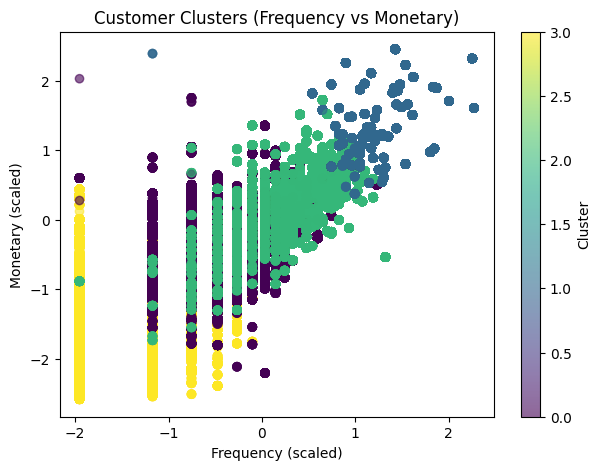

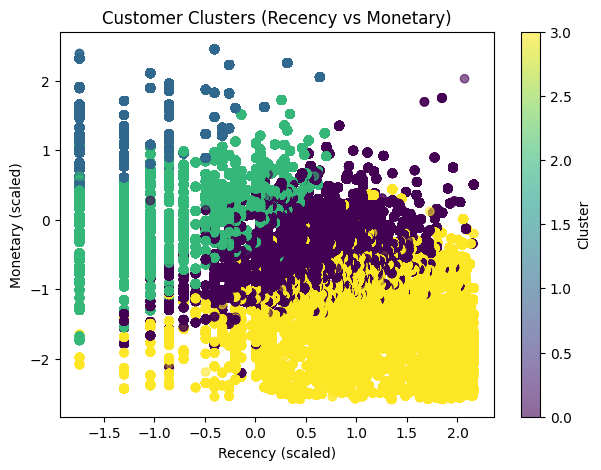

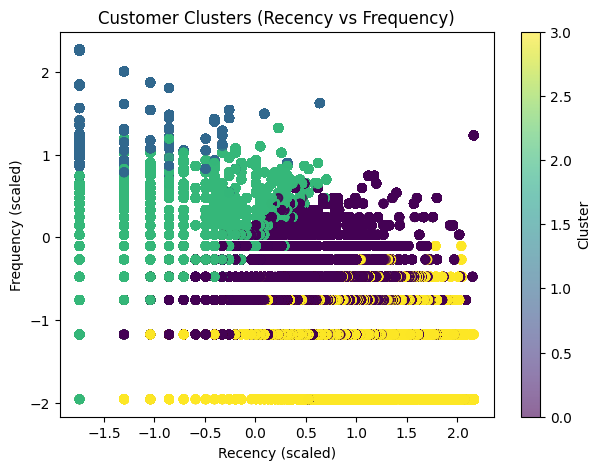

In [33]:
# 2D Scatter Plots (pairwise RFM)

import matplotlib.pyplot as plt

# 2D Scatter: Frequency vs Monetary
plt.figure(figsize=(7,5))
plt.scatter(df["Frequency_scaled"], df["Monetary_scaled"],
            c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Frequency (scaled)")
plt.ylabel("Monetary (scaled)")
plt.title("Customer Clusters (Frequency vs Monetary)")
plt.colorbar(label="Cluster")
plt.show()

# 2D Scatter: Recency vs Monetary
plt.figure(figsize=(7,5))
plt.scatter(df["Recency_scaled"], df["Monetary_scaled"],
            c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Recency (scaled)")
plt.ylabel("Monetary (scaled)")
plt.title("Customer Clusters (Recency vs Monetary)")
plt.colorbar(label="Cluster")
plt.show()

# 2D Scatter: Recency vs Frequency
plt.figure(figsize=(7,5))
plt.scatter(df["Recency_scaled"], df["Frequency_scaled"],
            c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Recency (scaled)")
plt.ylabel("Frequency (scaled)")
plt.title("Customer Clusters (Recency vs Frequency)")
plt.colorbar(label="Cluster")
plt.show()


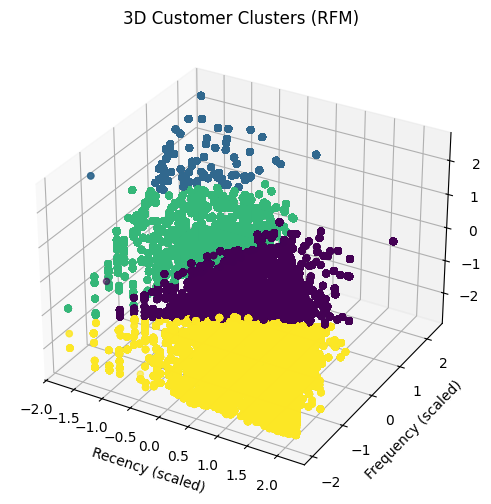

In [35]:
# 3D Scatter Plot (RFM together)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Recency_scaled"],
           df["Frequency_scaled"],
           df["Monetary_scaled"],
           c=df["Cluster"], cmap="viridis", alpha=0.6)

ax.set_xlabel("Recency (scaled)")
ax.set_ylabel("Frequency (scaled)")
ax.set_zlabel("Monetary (scaled)")
ax.set_title("3D Customer Clusters (RFM)")
plt.show()


In [ ]:
# Ways to speed it up

# Use a sample of the data

# df_sample = df.sample(frac=0.1, random_state=42)


# 10‚Äì20% of data is usually enough to get a clear elbow.

# Reduce dimensions

# Apply PCA before K-means if you have many features:

# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
# df_reduced = pca.fit_transform(df_scaled)


# Increase tolerance or reduce iterations

# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=k, max_iter=200, tol=1e-3, n_init=10)


# Use MiniBatchKMeans

# Works faster on large datasets by using mini-batches instead of the full dataset:

# from sklearn.cluster import MiniBatchKMeans
# kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1000)


# Handle outliers first

# Removing extreme points can make centroids converge faster.